In [1]:
import pandas as pd
import numpy as np

In [2]:
anime_data = pd.read_csv('anime.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'anime.csv'

In [41]:
def func(x):
    if x['genre'] is np.nan:
        return x
    else:
        genres = list(map(lambda y: y.strip(), x['genre'].split(',')))
        for g in genres:
            x[g] = 1
        return x


anime2 = anime_data.apply(func, axis=1)
anime2.head(1)


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,anime_id,episodes,genre,members,name,rating,type
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,32281,1,"Drama, Romance, School, Supernatural",200630,Kimi no Na wa.,9.37,Movie


In [42]:
anime_data = anime2.drop(columns=[ 'members'])


In [43]:
one_hot=pd.get_dummies(anime_data['type'])

In [44]:
anime3 = (anime_data
          .drop(columns=['type', 'episodes', 'genre'])
          .join(one_hot, rsuffix='-type'))

In [45]:
anime3

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yuri,anime_id,name,rating,Movie,Music-type,ONA,OVA,Special,TV
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,32281,Kimi no Na wa.,9.37,1,0,0,0,0,0
1,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,5114,Fullmetal Alchemist: Brotherhood,9.26,0,0,0,0,0,1
2,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28977,Gintama°,9.25,0,0,0,0,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9253,Steins;Gate,9.17,0,0,0,0,0,1
4,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9969,Gintama&#039;,9.16,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9316,Toushindai My Lover: Minami tai Mecha-Minami,4.15,0,0,0,1,0,0
12290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5543,Under World,4.28,0,0,0,1,0,0
12291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5621,Violence Gekiga David no Hoshi,4.88,0,0,0,1,0,0
12292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,4.98,0,0,0,1,0,0


In [46]:
attr = anime3.columns.tolist()
attr

['Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri',
 'anime_id',
 'name',
 'rating',
 'Movie',
 'Music-type',
 'ONA',
 'OVA',
 'Special',
 'TV']

In [47]:
attr.remove('anime_id')
attr.remove('rating')
attr.remove('name')



In [48]:
anime3[attr] = anime3[attr].mul(anime3['rating'], axis=0)

In [49]:
anime_data = anime3.fillna(value=0)

In [50]:
anime3 = anime3.fillna(value=0)
anime3=anime3.drop(columns=['name','rating'])

In [51]:
anime3.columns.tolist()

['Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri',
 'anime_id',
 'Movie',
 'Music-type',
 'ONA',
 'OVA',
 'Special',
 'TV']

In [59]:
look_up= anime3['anime_id']

In [61]:
anime3 = anime3.drop(columns=['anime_id'])

In [62]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

/tmp/ipykernel_137/283373844.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([0.11618466, 0.08993139, 0.07097616, 0.0682387 , 0.05960042,
       0.05366487, 0.04337962, 0.04075153, 0.0367125 , 0.03256997,
       0.02857836, 0.02725593, 0.02617407, 0.02447406, 0.02203311,
       0.0201515 , 0.01819371, 0.01726534, 0.01535848, 0.01510409,
       0.01465598, 0.0141665 , 0.01291978, 0.01175258, 0.01099486,
       0.01029227, 0.01001276, 0.00930921, 0.00846705, 0.00761238,
       0.00664618, 0.0063067 , 0.00620692, 0.00584675, 0.00544456,
       0.00464081, 0.0042174 , 0.00380064, 0.00323003, 0.00317731,
       0.00244016, 0.00226088, 0.00164124, 0.00159396, 0.00153354,
       0.00143023, 0.00111403, 0.00086118, 0.00082567])

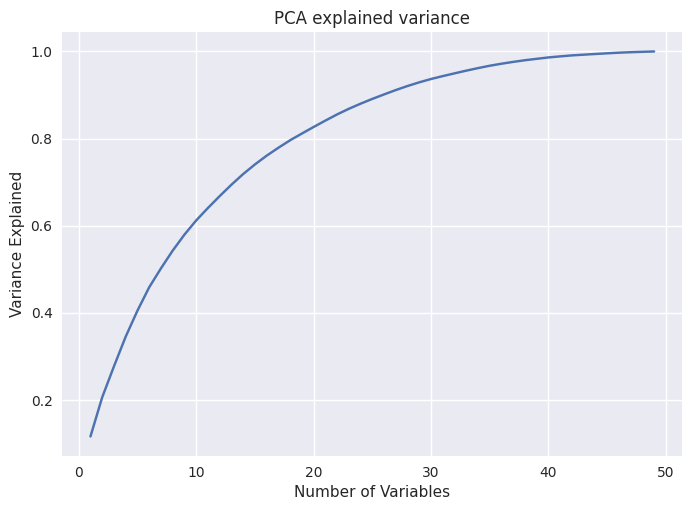

In [63]:
%matplotlib inline

pca = PCA()
pca.fit(anime3)
acc_var = np.cumsum(pca.explained_variance_ratio_) 

plt.style.use('seaborn')
plt.plot(range(1, len(acc_var)+1), acc_var)
plt.title('PCA explained variance')
plt.xlabel('Number of Variables')
_ = plt.ylabel('Variance Explained')
pca.explained_variance_ratio_

In [64]:
number_of_comp = 20
pca.set_params(n_components= number_of_comp)
pca.fit(anime3)
anime_pca = pca.transform(anime3)
anime_pos_pca = pd.DataFrame(anime_pca)





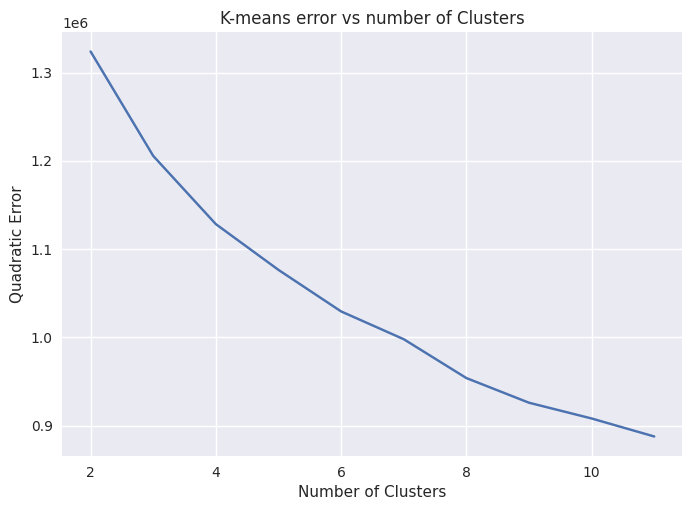

In [66]:
inertia = []
scores = []
for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(anime_pos_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 12), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Quadratic Error')
_ = plt.title('K-means error vs number of Clusters')

In [70]:
kmeans = KMeans(n_clusters=7 )
cluster_data = kmeans.fit_predict(anime_pos_pca)

In [71]:
anime_pos_pca
anime_data_output = anime3
anime_data_output['label'] = cluster_data

In [72]:
anime_data_output

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Vampire,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV,label
0,0.00,0.00,0.0,0.00,0.0,0.0,9.37,0.0,0.00,0.0,...,0.0,0.0,0.0,9.37,0.0,0.0,0.00,0.0,0.00,0
1,9.26,9.26,0.0,0.00,0.0,0.0,9.26,0.0,9.26,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.26,6
2,9.25,0.00,0.0,9.25,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.25,1
3,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.17,6
4,9.16,0.00,0.0,9.16,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,4.15,0.0,0.00,2
12290,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,4.28,0.0,0.00,2
12291,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,4.88,0.0,0.00,2
12292,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,4.98,0.0,0.00,2


In [76]:
indexer = look_up.tolist()

In [77]:
anime_data_output['index'] = indexer

In [78]:
anime_data_output

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV,label,index
0,0.00,0.00,0.0,0.00,0.0,0.0,9.37,0.0,0.00,0.0,...,0.0,0.0,9.37,0.0,0.0,0.00,0.0,0.00,0,32281
1,9.26,9.26,0.0,0.00,0.0,0.0,9.26,0.0,9.26,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.26,6,5114
2,9.25,0.00,0.0,9.25,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.25,1,28977
3,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.17,6,9253
4,9.16,0.00,0.0,9.16,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,9.16,1,9969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,4.15,0.0,0.00,2,9316
12290,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,4.28,0.0,0.00,2,5543
12291,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,4.88,0.0,0.00,2,5621
12292,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,4.98,0.0,0.00,2,6133


In [82]:
#anime_data_output.to_csv('resultsCluster.csv')

In [88]:
#anime2[['name','anime_id']].to_csv('lookupid.csv')

In [89]:
x= anime2[['name','anime_id']]

In [94]:
x['name'] =x['name'].str.lower()

/tmp/ipykernel_137/72647087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['name'] =x['name'].str.lower()


In [95]:
x

,name,anime_id
0,kimi no na wa.,32281
1,fullmetal alchemist: brotherhood,5114
2,gintama°,28977
3,steins;gate,9253
4,gintama&#039;,9969
...,...,...
12289,toushindai my lover: minami tai mecha-minami,9316
12290,under world,5543
12291,violence gekiga david no hoshi,5621
12292,violence gekiga shin david no hoshi: inma dens...,6133


In [106]:
x[x['anime_id']==10987]

,name,anime_id
10876,zettai zetsumei dangerous jiisan (2004),10987


In [99]:
anime_data_output[anime_data_output['index']==20]

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV,label,index
841,7.81,0.0,0.0,7.81,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.81,4,20


In [101]:
anime_data_output[anime_data_output['label' ]== 4]

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Yaoi,Yuri,Movie,Music-type,ONA,OVA,Special,TV,label,index
5,0.00,0.00,0.0,9.15,0.0,0.00,9.15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.15,4,32935
14,0.00,0.00,0.0,8.93,0.0,0.00,8.93,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.93,4,28891
20,0.00,0.00,0.0,8.83,0.0,0.00,8.83,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.83,4,263
23,8.82,0.00,0.0,8.82,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.82,4,30276
26,0.00,0.00,0.0,8.80,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.80,4,17074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10876,0.00,0.00,0.0,6.55,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.55,4,10987
10877,0.00,0.00,0.0,7.00,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.00,4,22709
10882,7.17,7.17,0.0,7.17,0.0,7.17,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.17,4,31427
10892,0.00,6.47,0.0,6.47,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.47,4,7808


In [107]:
anime_pos_pca
anime_data_output_2 = anime_pos_pca
anime_data_output_2['label'] = cluster_data

In [108]:
anime_data_output_2['index'] = indexer

In [109]:
anime_data_output_2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,label,index
0,-0.206506,-0.563439,0.317522,-5.456616,-0.731626,13.884357,2.997422,-5.266460,-0.487689,5.259108,...,-0.529717,6.533639,0.111057,4.093718,0.013268,-0.634849,-3.532786,0.673224,0,32281
1,11.378760,11.205390,-0.078918,-0.829518,8.742121,3.368638,3.177336,0.994633,4.529009,-1.117932,...,0.858570,-5.393561,-0.204981,2.342823,-2.083355,3.216719,1.471081,3.454048,6,5114
2,12.371966,3.590411,-3.522050,5.666310,-4.425759,-1.756962,-1.592753,-2.897913,1.362337,-3.438535,...,-0.746888,-1.335666,-2.428528,-6.055771,8.931566,2.804498,-1.203195,-5.519162,1,28977
3,3.612641,1.916101,-5.679057,-3.580982,-2.101428,-3.498208,-3.441342,2.198112,-1.975402,1.673203,...,1.802897,1.334781,-1.431290,0.249102,0.320964,-0.148144,1.782006,-3.635773,6,9253
4,12.221680,3.548776,-3.486992,5.591969,-4.393261,-1.758415,-1.572722,-2.870134,1.353203,-3.397426,...,-0.742952,-1.328995,-2.405819,-5.995705,8.844525,2.774389,-1.186308,-5.457356,1,9969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,-5.563787,-0.551937,-1.758460,0.742158,0.978225,-1.486863,-0.486866,-0.427194,0.590843,0.589119,...,0.324216,-0.678987,-1.172959,0.087547,-0.742918,-0.399164,-0.562919,-0.264116,2,9316
12290,-5.641779,-0.547652,-1.816086,0.827249,1.042877,-1.473724,-0.516712,-0.439232,0.596085,0.582933,...,0.345096,-0.679892,-1.206742,0.086603,-0.765741,-0.402581,-0.597230,-0.298489,2,5543
12291,-6.001744,-0.527872,-2.082053,1.219979,1.341268,-1.413085,-0.654463,-0.494793,0.620278,0.554385,...,0.441465,-0.684071,-1.362662,0.082246,-0.871083,-0.418352,-0.755587,-0.457130,2,5621
12292,-6.061738,-0.524576,-2.126380,1.285433,1.390999,-1.402979,-0.677422,-0.504053,0.624310,0.549627,...,0.457527,-0.684767,-1.388648,0.081519,-0.888640,-0.420980,-0.781980,-0.483570,2,6133


In [110]:
anime_data_output_2.to_csv('resultsCluster2.csv')